In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder, StandardScaler

%matplotlib inline

#from ml_pipeline import MLDataPipeline

In [2]:
# Import other necessary libraries for the remaining techniques

def check_missing_data(df: pd.DataFrame) -> pd.DataFrame:
        display(df.info())
        display(df.head())
        display(df.describe())
        missing_columns = df.columns[df.isnull().any()].tolist()
        if len(missing_columns) > 0:
            print("Columns with missing data:")
            for col in missing_columns:
                missing_rows = df[col].isnull().sum()
                print(f"{col}: {missing_rows} missing rows")
        else:
            print("No columns have missing data.")

def encode_categorical_features(df: pd.DataFrame) -> pd.DataFrame:
    # Encode categorical features using one-hot encoding
    encoded_df = pd.get_dummies(df, drop_first=True)
    return encoded_df

def scale_numerical_features(df: pd.DataFrame) -> pd.DataFrame:
    # Scale numerical features using StandardScaler
    scaled_df = df.copy()
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

    for col in numerical_cols:
        scaler = StandardScaler()
        scaled_df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))

    return scaled_df

def run_multiple_ml_techniques(df: pd.DataFrame, target_feature: str, techniques: list, num_folds: int = 10, test_size: float = 0.2) -> pd.DataFrame:
    
    # Encode categorical features and scale numerical features
    #processed_df = encode_categorical_features(scale_numerical_features(df.drop(target_feature, axis=1)))

    # Define the features and target variable
    X = df.drop(target_feature, axis=1)
    y = df[target_feature]

    # Create an empty DataFrame to store the model results
    model_results = pd.DataFrame(columns=['Technique', 'Accuracy', 'Precision', 'Recall', 'Confusion Matrix'])

    # Loop through each technique
    for technique_name, model in techniques:
        # Split the data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

        # Perform cross-validation
        y_train_pred = cross_val_predict(model, X_train, y_train, cv=num_folds)

        # Train the model on the entire training set
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_test_pred = model.predict(X_test)

        # Calculate evaluation metrics (accuracy, precision, recall, etc.)
        accuracy = accuracy_score(y_test, y_test_pred)
        precision = precision_score(y_test, y_test_pred)
        recall = recall_score(y_test, y_test_pred)

        # Calculate confusion matrix
        cm = confusion_matrix(y_train, y_train_pred)

        # Append the model results to the DataFrame
        model_results = pd.concat([model_results, pd.DataFrame({'Technique': [technique_name], 'Accuracy': [accuracy], 'Precision': [precision], 'Recall': [recall], 'Confusion Matrix': [cm]})], ignore_index=True)

    # Find the best model based on the evaluation metric
    best_model = model_results.sort_values('Accuracy', ascending=False).iloc[0]

    # Print the best model
    print("Best Model:")
    print(best_model)

    return model_results

In [3]:
dataset = pd.read_csv("Loan_data.csv")

In [4]:
print(dataset.shape)

(614, 13)


In [5]:
check_missing_data(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


None

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Columns with missing data:
Gender: 13 missing rows
Married: 3 missing rows
Dependents: 15 missing rows
Self_Employed: 32 missing rows
LoanAmount: 22 missing rows
Loan_Amount_Term: 14 missing rows
Credit_History: 50 missing rows


In [6]:
#dataset['Loan_Status'] = dataset['Loan_Status'].replace({'N': '0', 'Y': '1'})

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
dataset.apply(lambda x: sum(x.isnull()))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Text(0, 0.5, 'Frequency')

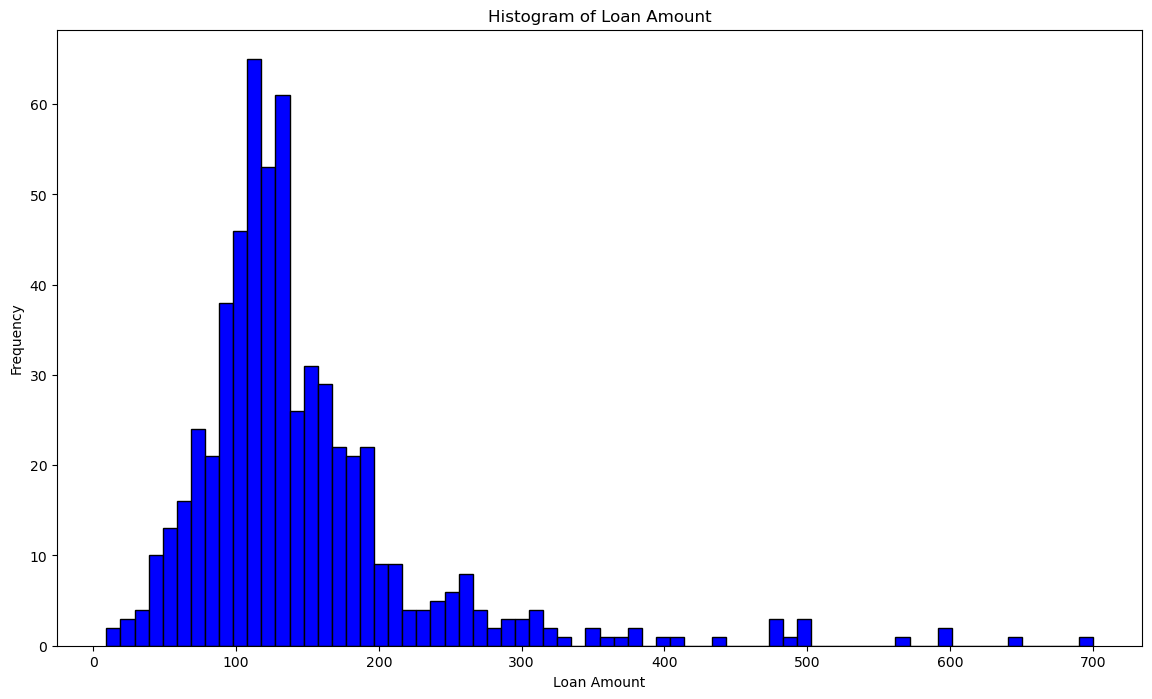

In [9]:
plt.figure(figsize=(14,8))
plt.hist(dataset['LoanAmount'].dropna(), color = 'blue', edgecolor = 'black',
         bins = int(700/10))
plt.title('Histogram of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

<Axes: xlabel='LoanAmount', ylabel='Count'>

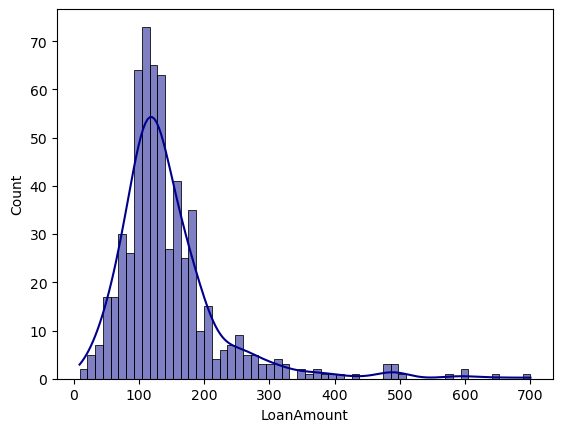

In [10]:
# Density Plot and Histogram of the loan amount
sns.histplot(dataset['LoanAmount'].dropna(), kde=True, bins=int(700/12), color = 'darkblue')

# Data Cleaning

In [33]:
def replace_missing_data(df: pd.DataFrame, method: str = 'mean') -> pd.DataFrame:
    # Create a copy of the DataFrame
    filled_df = df.copy()

    # Iterate over each column in the DataFrame
    for col in filled_df.columns:
        # Check if the column contains numeric data
        if filled_df[col].dtype in [np.float64, np.int64]:
            if method == 'mean':
                filled_df[col].fillna(filled_df[col].mean(), inplace=True)
            elif method == 'median':
                filled_df[col].fillna(filled_df[col].median(), inplace=True)
        else:
            if method == 'mode':
                filled_df[col].fillna(filled_df[col].mode()[0], inplace=True)

    return filled_df

In [11]:
# Replace missing values with the median 
median = dataset['ApplicantIncome'].median()
dataset['ApplicantIncome'].fillna(median, inplace=True)

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

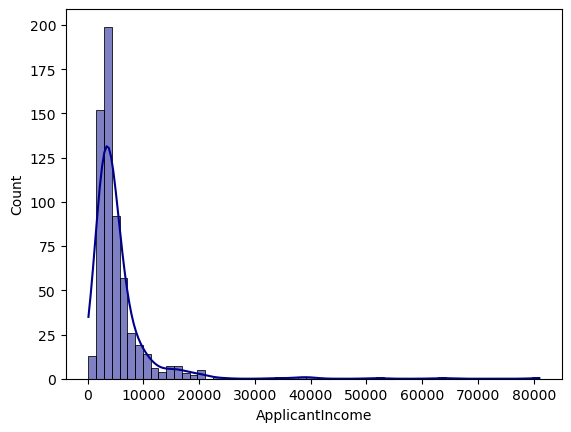

In [12]:
# Density Plot and Histogram of ApplicantIncome
sns.histplot(dataset['ApplicantIncome'].dropna(), kde=True, bins=int(700/12), color = 'darkblue')

In [13]:
#filling the missing values with mean
mean = dataset['CoapplicantIncome'].mean()
dataset['CoapplicantIncome'].fillna(mean, inplace=True)

In [14]:
#Treating missing data with the mean or median
mean = dataset['LoanAmount'].mean()
dataset['LoanAmount'].fillna(mean,inplace=True)

In [15]:
# Replace missing values with the median 
median = dataset['Loan_Amount_Term'].median()
dataset['Loan_Amount_Term'].fillna(median, inplace=True)

In [16]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


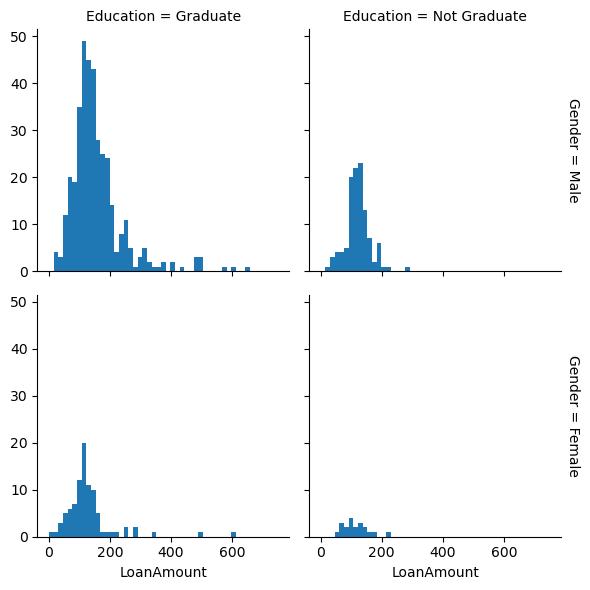

In [17]:
grid = sns.FacetGrid(dataset, row="Gender", col="Education", margin_titles=True)
grid.map(plt.hist, "LoanAmount", bins=np.linspace(0, 750, 50));

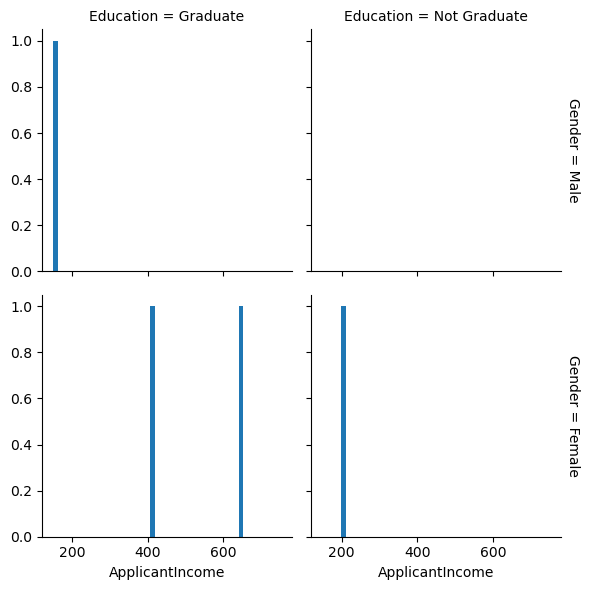

In [18]:
grid = sns.FacetGrid(dataset, row="Gender", col="Education", margin_titles=True)
grid.map(plt.hist, "ApplicantIncome", bins=np.linspace(150, 750, 50));

In [19]:
#changing credit history to object
dataset['Credit_History']= dataset.Credit_History.astype(object)

In [20]:
dataset.Credit_History.dtypes

dtype('O')

In [ ]:
# Assuming you have a DataFrame called `df` with missing values
# Specify the method to use: 'mean', 'median', or 'mode'
filled_df = replace_missing_data(dataset, method='mean')
filled_df

In [21]:
#First we import a function to determine the mode
from scipy.stats import mode
mode(dataset['Gender'])
mode(dataset['Gender']).mode[0]

C:\Users\seune\AppData\Local\Temp\ipykernel_19528\1619667643.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode(dataset['Gender'])
C:\Users\seune\AppData\Local\Temp\ipykernel_19528\1619667643.py:3: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  mode(dataset['Gender'])
C:\Users\seune\AppData\Local\Temp\ipykernel_19528\1619667643.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavi

'Male'

In [22]:
#Create a new function:
def num_missing(x):
  return sum(x.isnull())

#Impute the values:
dataset['Gender'].fillna(mode(dataset['Gender']).mode[0], inplace=True)
dataset['Married'].fillna(mode(dataset['Married']).mode[0], inplace=True)
dataset['Self_Employed'].fillna(mode(dataset['Self_Employed']).mode[0], inplace=True)
dataset['Dependents'].fillna(mode(dataset['Dependents']).mode[0], inplace=True)
dataset['Credit_History'].fillna(mode(dataset['Credit_History']).mode[0], inplace=True)

#Now check the #missing values again to confirm if the code has worked:
print (dataset.apply(num_missing, axis=0))

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


C:\Users\seune\AppData\Local\Temp\ipykernel_19528\4183286589.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  dataset['Gender'].fillna(mode(dataset['Gender']).mode[0], inplace=True)
C:\Users\seune\AppData\Local\Temp\ipykernel_19528\4183286589.py:6: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  dataset['Gender'].fillna(mode(dataset['Gender']).mode[0], inplace=True)
C:\Users\seune\AppData\Local\Temp\ipykernel_19528\4183286589.py:

In [23]:
#drop unwanted columns
dataset = dataset.iloc[:,1:]
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [24]:
processed_df = encode_categorical_features(scale_numerical_features(dataset))
#concatenated_df = pd.concat([processed_df, dataset.Loan_Status], axis="columns")
processed_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.072991,-0.554487,0.000000,0.273231,0.411733,1,0,0,0,0,0,0,0,1,1
1,-0.134412,-0.038732,-0.219273,0.273231,0.411733,1,1,1,0,0,0,0,0,0,0
2,-0.393747,-0.554487,-0.957641,0.273231,0.411733,1,1,0,0,0,0,1,0,1,1
3,-0.462062,0.251980,-0.314547,0.273231,0.411733,1,1,0,0,0,1,0,0,1,1
4,0.097728,-0.554487,-0.064454,0.273231,0.411733,1,0,0,0,0,0,0,0,1,1


In [28]:
train_data ,test_data = train_test_split(processed_df, test_size=0.4)

In [29]:
train_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
431,0.179641,-0.554487,-0.493184,0.273231,-2.428760,1,0,0,0,0,0,0,0,0,0
267,-0.175368,0.064898,0.161820,0.273231,-2.428760,1,1,0,0,1,0,0,0,1,1
463,-0.034806,-0.554487,-0.171637,0.273231,0.411733,0,0,1,0,0,1,0,1,0,1
359,-0.038738,0.528668,0.638186,0.273231,0.411733,1,1,0,0,1,0,0,1,0,1
496,-0.459277,0.026935,-0.469366,0.273231,0.411733,1,1,0,0,0,1,0,0,0,1


In [32]:
# Assuming you have a training dataset called `train_df` and the target feature is 'target_variable'

# Define the list of ML techniques to use
techniques = [('Decision Tree', DecisionTreeClassifier()),
              ('Random Forest', RandomForestClassifier()),
              ('Logistic Regression', LogisticRegression()),
             ('LDA', LinearDiscriminantAnalysis())]
# Add other techniques as desired

model_results = run_multiple_ml_techniques(train_data, 'Loan_Status_Y', techniques, num_folds=10, test_size=0.25)

# Display the model results
print(model_results)

Best Model:
Technique                   Random Forest
Accuracy                         0.771739
Precision                         0.77027
Recall                           0.934426
Confusion Matrix    [[28, 52], [21, 175]]
Name: 1, dtype: object
             Technique  Accuracy  Precision    Recall       Confusion Matrix
0        Decision Tree  0.652174   0.745763  0.721311  [[37, 43], [40, 156]]
1        Random Forest  0.771739   0.770270  0.934426  [[28, 52], [21, 175]]
2  Logistic Regression  0.771739   0.763158  0.950820   [[29, 51], [8, 188]]
3                  LDA  0.771739   0.756410  0.967213   [[29, 51], [7, 189]]
